### 퍼셉트론perceptron
* 신경망(딥러닝)의 기원이 되는 알고리즘
* 1943년 메컬러, 핏츠가 생물의 신경세포를 모방한 형식적인 신경모형에 대한 논문에서 최초 제안
<img src='img/logical_calculus.png' width='350px'>

* 1957년 프랑크 로젠블라트가 고안한 알고리즘 발표
    + 전자부품을 이용해서 물리적 회로망 구성<br><br>
* 1969년 민스키가 퍼셉트론의 한계를 수학적으로 증명
    + 즉, 단순한 선형분류기이므로 간단한 XOR 분류는 수행할 수 없음
    + 이로서 인공신경망 연구는 소멸, 투자 감소 - AI 빙하기 도래
    + 키워드 : 인공지능 <br><br>

* 1986년 럼멜하트, 힌튼이 은닉층을 이용한 다층 퍼셉트론MLP와 역전파backpropagation 알고리즘을 이용해서 XOR문제를 해결함
<img src='img/xor_solve.gif'>

* 1989년 러쿤은 합성곱Convolutional Neural Networks 알고리즘을 적용해서 필기숫자 인식문제를 해결하는 논문 발표

* 한편, 이러한 알고리즘은 학습시간이 많이 걸리고 사람만이 가능한 일을 기계가 하도록 프로그래밍 하는 것이 어려움. 
    + 또한, 성능이 좋은 하드웨어를 필요로 함
    + MLP보다 성능이 좋은 Random Forest와 커널기반의 SVM이 주목받음 - 2번째 AI 빙하기 도래
    + 키워드 : 인공신경망<br><br>
<img src='img/xor_limitation.gif'>
   
* 2006년 힌튼이 신경망 학습시 가중치의 초기값을 적절히 조절하면 학습효과가 좋아진다고 논문에서 발표
    + 사전훈련의 중요성 설파<br><br>
* 2007년 벤지오 팀이 자기부호화autoencoder를 통한 사전학습 방법을 제안

* 2012년 힌튼 교수의 제자 알렉스가 딥러닝 기반 알고리즘으로 IMAGENET 이미지 분류대회에서 84.7% 정확도 달성
    + 성능이 좋은 GPU의 도움을 받아 딥러닝의 성능이 한층 개선됨<br><br>

* 성능이 좋은 하드웨어의 출현과 인터넷의 도움으로 막대한 크기의 데이터 수집 가능 => 분석에 활용할 기회가 제공 => 딥러닝의 성능이 한층 개선
* 키워드 : 딥러닝

### 퍼센트론의 동작원리
* 가중치weight : 전기전자의 개념을 비유하자면 전류의 흐름을 억제하는 매개변수(저항)와 유사
    + 오차를 발생하게 하는 외부요인(=기울기)<br><br>
* 편향bais : 오차를 발생하게 하는 외부요인(=절편)
* 입력값과 가중치의 곱을 모두 더한 후 활성화 함수를 적용해서 
    + 그 값이 0보다 크면 1 0보다 작으면 작으면 0을 출력하는 분류기를 만듦
#### $ y = 0 : x_1w_1 + x_2w_2 + b < 0 $
#### $ y = 1 : x_1w_1 + x_2w_2 + b > 0 $

### 퍼셉트론 구현하기
<img src='img/perceptron_image.png'>
* 입력값 x1, x2와 가중치w1, w2들의 곱을 모두 더한후 활성화 함수sigmoid를 적용해서 그값이 0보다 크면1, 0보다 작으면 0을 출력하는 분류기
* 임계치theta를 넘어서면 1로 출력하기도함

In [1]:
import numpy as np

In [2]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])  # 가중치
    b = -0.7                  # 편향
    val = 0                   # 출력값
    # sum = x1*w1 + x2*w2 + b
    sum = np.sum(x * w) + b   # 행렬을 사용하면 식이 간단

    if sum > 0: val = 1       # 0보다 크면 1로 출력

    return val

In [3]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])  # 가중치
    b = -0.2                  # 편향
    val = 0                   # 출력값
    sum = np.sum(x * w) + b   # 행렬을 사용하면 식이 간단

    if sum > 0: val = 1       # 0보다 크면 1로 출력

    return val

In [4]:
print('0 AND 0 = ', AND(0,0))
print('0 AND 1 = ', AND(0,1))
print('1 AND 0 = ', AND(1,0))
print('1 AND 1 = ', AND(1,1))

0 AND 0 =  0
0 AND 1 =  0
1 AND 0 =  0
1 AND 1 =  1


In [5]:
print('0 OR 0 = ', OR(0,0))
print('0 OR 1 = ', OR(0,1))
print('1 OR 0 = ', OR(1,0))
print('1 OR 1 = ', OR(1,1))

0 OR 0 =  0
0 OR 1 =  1
1 OR 0 =  1
1 OR 1 =  1


In [6]:
# AND 앞에 Not 을 붙임 
# AND연산의 반대가 나옴
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])  # NAND는 가중치를 음수로
    b = 0.7                     # 편향은 양수로
    val = 0
    sum = np.sum(x * w) + b

    if sum > 0: val = 1

    return val

In [7]:
print('0 NAND 0 = ', NAND(0,0))
print('0 NAND 1 = ', NAND(0,1))
print('1 NAND 0 = ', NAND(1,0))
print('1 NAND 1 = ', NAND(1,1))

0 NAND 0 =  1
0 NAND 1 =  1
1 NAND 0 =  1
1 NAND 1 =  0


### 베타적 논리합XOR
* 하나 이상의 퍼셉트론을 이용 MLP
* 즉, AND, OR, NAND 퍼셉트론을 조합해서 구현

<img src='img/neural3.jpg' width='50%'>

In [8]:
def XOR(x1, x2):
    p1 = NAND(x1, x2)
    p2 = OR(x1, x2)
    val = AND(p1, p2)

    return val

In [9]:
print('0 XOR 0 = ', XOR(0,0))
print('0 XOR 1 = ', XOR(0,1))
print('1 XOR 0 = ', XOR(1,0))
print('1 XOR 1 = ', XOR(1,1))

0 XOR 0 =  0
0 XOR 1 =  1
1 XOR 0 =  1
1 XOR 1 =  0


### 활성화 함수activation function
* 신경망 개별 뉴런에 들어오는 입력신호의 총합을
* 출력신호로 변환하는 함수
* 퍼셉트론에는 없었지만 신경망에서 도입하기 시작
* 대개 선형함수가 아닌 비선형함수를 활성화 함수로 사용
* 종류는 sigmoid, relu, tanh, softmax

### perceptron 계산하기1
<img src='img/testme.png' width= '30%'>
* 입력값 : x1, x2 = 1.0, 0.5
* 가중치 : w1, w2, w3, w4 = 0.9, 0.2, 0.3, 0.8<br>
    * 첫번째 노드 출력값 : (1.0 X 0.9) + (0.5 X 0.3)<br>
    * 첫번째 노드 출력값(가중치x) : 1.0 + 0.5 => 1.05<br><br>
    
* 좀 더 나은 신경망 학습을 위해 활성화 함수를 사용해서 노드 출력값을 조정함
    + 시그모이드 함수 : y = 1 / (1 + e ** -x)
    + 첫번째 노드 출력값(가중치 + 활성화함수)
    + 1 / (1 + 2.71828 ** -1.05) = 1 / (1 + 0.3499) => 0.7408

### perceptron 계산하기2
* 지금까지 수작업으로 다층 퍼셉트론에 전달되는 값에 대한 결과값을 계산하였음
* 한편, 복잡하게 구성되는 다층 퍼셉트론에서는 이러한 수작업은 불가능에 가까움
* 수 많은 계층과 노드들을 가지는 복잡한 신경망의 계산은 매우 간결하게 출력값을 구할 수 있는 수학적 방법이 필요
    + 간결한 접근 방법을 제공하는 것 : 행렬(벡터) 연산
    + 신경망의 각 노드의 입력값/가중치는 벡터로 표현

<img src='img/testme2.png' width= '30%'>

In [10]:
# numpy 행렬값 출력 형식 지정 : 소수 3자리
# np.set_printoptions(precision=3)
np.set_printoptions(
       formatter={'float':'{:.3f}'.format})

In [11]:
# 시그모이드 함수 정의
def sigmoid(x):
    try:
        # 입력값이 행렬이라면
        for i in range(0, len(x)):
            x[i] = 1 / (1 + np.e ** -x[i])
    except:
        # 입력값이 단일값이라면
        x = 1 / (1 + np.e ** -x)

    return x

In [22]:
X = np.array([1.0, 0.5])
W = np.array([[0.9, 0.2],
             [0.3, 0.8]])
Y = np.dot(X,W)

Y

array([1.050, 0.600])

In [54]:
X = np.array([0.9, 0.1, 0.8])
W1 = np.array([[0.9, 0.3, 0.4], [0.2,0.8,0.2],[0.1,0.5,0.6]])
W2 = np.array([[0.3, 0.7, 0.5], [0.6,0.5,0.2],[0.8,0.1,0.9]])

In [55]:
Y1 = np.dot(X,W1)
Y2 = np.dot(Y1,W2)

In [56]:
sigmoid(Y2)

array([0.804, 0.750, 0.799])

<img src='img/testme2.png' width= '30%'>

* 입력층, 은닉층, 출력층으로 구성된 신경망에서
* 입력값과 가중치와 활성화 함수 계산과정을
* 행렬로 표현해서 알아봄


In [48]:
X = np.array([0.9, 0.1, 0.8])
W1 = np.array([[0.9, 0.3, 0.4],[0.2, 0.8, 0.2],[0.1, 0.5, 0.6]])
W2 = np.array([[0.3, 0.7, 0.5],[0.6, 0.5, 0.2],[0.8, 0.1, 0.9]])

In [49]:
# 입력층에서 은닉층으로 순전파
Y1 = np.dot(X, W1)

In [50]:
# 은닉층에서 출력층으로 순전파
Y2 = np.dot(X, W2)

In [51]:
# 활성화함수를 이용해서 최종결과값 계산
sigmoid(Y2)

array([0.725, 0.681, 0.767])

### 활성화 함수의 중요성
* 입력값과 가중치의 곱의 합으로 나온 결과를 한번 더 정재하기 위한 목적의 함수
* 여러 노드가 보내주는 값을 적절하게 필터링해서 출력층으로 값을 보내줘야만 올바른 분석을 할 수 있는 결과 도출

### 활성화 함수의 종류
* 시그모이드 : 초기 신경망에서 사용했던 활성화 함수
    + MLP 신경망에서 발생된 문제 때문에 더이상 사용하지 않는 활성화 함수
    + 가중치 소멸문제 : vanishing gradient<br><br>

* tanh : 하이퍼블릭 탄첸트
    + 시그모이드 함수의 y값의 범위를 -1~1로 확장
    + 여전히 은닉층 수가 증가하면 가중치 소멸문제 발생<br><br>

* ReLu : 힌튼 교수가 제안 - 시그모이드 함수의 대안
    + x가 0보다 작으면 모든 값을 0으로, x가 0보다 크면 x값 그대로 사용<br><br>

* ReLu-6 : x가 0보다 크면 그대로 사용하되 6을 넘지 않도록 조정

* softmax : 입력값에 대해 0 ~ 1사이의 값으로 출력하되
    + 출력값의 총합이 항상 1이 되도록 함
    + 주로 범주형 데이터분석시 사용하는 활성화 함수

In [57]:
import numpy as np
import matplotlib.pyplot as plt

In [58]:
def sigmoid(x):
    y = []
    for i in x:
        y.append(1 / (1 + np.e ** -i))
    return y

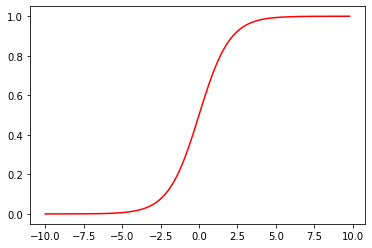

In [60]:
x = np.arange(-10, 10, 0.2)
sig = sigmoid(x)

plt.plot(x, sig, 'r')
plt.show()

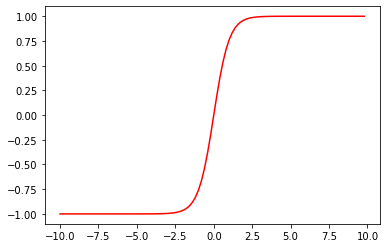

In [62]:
def tanh(x):
    y = []
    for i in x:
        # y.append(np.sinh(i) / np.cosh(i))
        y.append(np.tanh(i))
    return y

x = np.arange(-10, 10, 0.2)
tanh = tanh(x)

plt.plot(x, tanh, 'r')
plt.show()

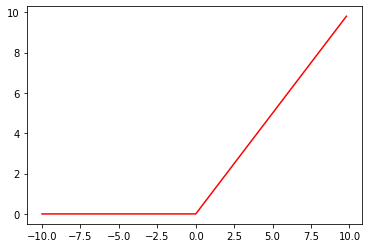

In [64]:
# ReLu
def relu(x):
    zeros = np.zeros(len(x))   # 입력수만큼 0행렬 생성
    y = np.max([zeros, x], axis=0)  # 행기준 최댓값 비교
    return y

x = np.arange(-10, 10, 0.2)
relu = relu(x)

plt.plot(x, relu, 'r')
plt.show()

[0.659 0.242 0.099] 1.0


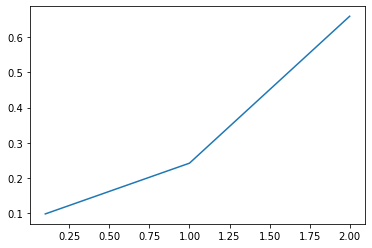

In [65]:
# softmax
def softmax(x):
    y = np.exp(x) / np.sum(np.exp(x), axis=0)
    return y

# x = np.arange(-10, 10, 0.2)
x = np.array([2.0, 1.0, 0.1])
softmax = softmax(x)
print(softmax, np.sum(softmax))  # 총합이 1인지 확인

plt.plot(x, softmax)
plt.show()

### 손실함수loss function
* 비용cost함수라고도 함
* 신경망이 잘 학습하고 있는지를 나타내주는 지표
* 손실loss,비용cost은 출력값과 실제값 사이의 오차를 의미
* 신경망에서는 이것들이 최소화되도록 하는 과정이 학습임
* 따라서, 손실이 최소화된다는 것은 학습이 잘되고 있음을 의미

* 딥러닝에서 손실함수는 평균제곱오차MSE(회귀)와 교차엔트로피오차CEE(분류)를 사용함

### 학습 최적화 방법
* 텐서플로에서는 optimizer로 설정

* 경사하강법SGD - 확률적 경사하강법 : 무작위 값을 대입

* 모멘텀        - SGD + 무작위값에 탄성을 부여 (정확도 개선)

* 아다그라드adagrad - 학습률에 탄성을 부여 (보폭크기 개선)
*                     무작위값 대입 횟수를 조절

* RMSprop - adagrad의 보폭 민감도를 개선 (보폭크기 개선)

* Adam - 무작위값에 탄성부여, 학습률에도 탄성 부여
*          즉, 정확도 개선 + 보폭크기 개선